In [1]:
import os
from collections import Counter
import logging
import sys
from pathlib import Path
import subprocess
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import IPython
import pandas as pd
from tqdm import tqdm

from dotenv import load_dotenv

/home/davenport/computational_genetic_genealogy/.venv/lib/python3.12/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [2]:
def find_comp_gen_dir():
    """Find the computational_genetic_genealogy directory by searching up from current directory."""
    current = Path.cwd()
    
    # Search up through parent directories
    while current != current.parent:
        # Check if target directory exists in current path
        target = current / 'computational_genetic_genealogy'
        if target.is_dir():
            return target
        # Move up one directory
        current = current.parent
    
    raise FileNotFoundError("Could not find computational_genetic_genealogy directory")

def load_env_file():
    """Find and load the .env file from the computational_genetic_genealogy directory."""
    try:
        # Find the computational_genetic_genealogy directory
        comp_gen_dir = find_comp_gen_dir()
        
        # Look for .env file
        env_path = comp_gen_dir / '.env'
        if not env_path.exists():
            print(f"Warning: No .env file found in {comp_gen_dir}")
            return None
        
        # Load the .env file
        load_dotenv(env_path, override=True)
        print(f"Loaded environment variables from: {env_path}")
        return env_path
        
    except FileNotFoundError as e:
        print(f"Error: {e}")
        return None

# Use the function
env_path = load_env_file()

working_directory = os.getenv('PROJECT_WORKING_DIR', default=None)
data_directory = os.getenv('PROJECT_DATA_DIR', default=None)
references_directory = os.getenv('PROJECT_REFERENCES_DIR', default=None)
results_directory = os.getenv('PROJECT_RESULTS_DIR', default=None)
utils_directory = os.getenv('PROJECT_UTILS_DIR', default=None)

os.environ["WORKING_DIRECTORY"] = working_directory
os.environ["DATA_DIRECTORY"] = data_directory
os.environ["REFERENCES_DIRECTORY"] = references_directory
os.environ["RESULTS_DIRECTORY"] = results_directory
os.environ["UTILS_DIRECTORY"] = utils_directory

print(f"Working Directory: {working_directory}")
print(f"Data Directory: {data_directory}")
print(f"References Directory: {references_directory}")
print(f"Results Directory: {results_directory}")
print(f"Utils Directory: {utils_directory}")

os.chdir(working_directory)
print(f"The current directory is {os.getcwd()}")

Loaded environment variables from: /home/davenport/computational_genetic_genealogy/.env
Working Directory: /home/davenport/computational_genetic_genealogy
Data Directory: /home/davenport/computational_genetic_genealogy/data
References Directory: /home/davenport/computational_genetic_genealogy/references
Results Directory: /home/davenport/computational_genetic_genealogy/results
Utils Directory: /home/davenport/computational_genetic_genealogy/utils
The current directory is /home/davenport/computational_genetic_genealogy


In [3]:
def configure_logging(log_filename, log_file_debug_level="INFO", console_debug_level="INFO"):
    """
    Configure logging for both file and console handlers.

    Args:
        log_filename (str): Path to the log file where logs will be written.
        log_file_debug_level (str): Logging level for the file handler.
        console_debug_level (str): Logging level for the console handler.
    """
    # Create a root logger
    logger = logging.getLogger()
    logger.setLevel(logging.DEBUG)  # Capture all messages at the root level

    # Convert level names to numeric levels
    file_level = getattr(logging, log_file_debug_level.upper(), logging.INFO)
    console_level = getattr(logging, console_debug_level.upper(), logging.INFO)

    # File handler: Logs messages at file_level and above to the file
    file_handler = logging.FileHandler(log_filename)
    file_handler.setLevel(file_level)
    file_formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
    file_handler.setFormatter(file_formatter)

    # Console handler: Logs messages at console_level and above to the console
    console_handler = logging.StreamHandler(sys.stdout)
    console_handler.setLevel(console_level)
    console_formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
    console_handler.setFormatter(console_formatter)

    # Add handlers to the root logger
    logger.addHandler(file_handler)
    logger.addHandler(console_handler)
    
def clear_logger():
    """Remove all handlers from the root logger."""
    logger = logging.getLogger()
    for handler in logger.handlers[:]:
        logger.removeHandler(handler)
        
log_filename = os.path.join(results_directory, "lab8.log")
print(f"The Lab 8 log file is located at {log_filename}.")

# Ensure the results_directory exists
if not os.path.exists(results_directory):
    os.makedirs(results_directory)

# Check if the file exists; if not, create it
if not os.path.exists(log_filename):
    with open(log_filename, 'w') as file:
        pass  # The file is now created.
    
clear_logger() # Clear the logger before reconfiguring it
configure_logging(log_filename, log_file_debug_level="INFO", console_debug_level="INFO")

The Lab 8 log file is located at /home/davenport/computational_genetic_genealogy/results/lab8.log.


Go to Lab0_Code_Environment and run the set of code cells for **Install R** and **Install liftover**.

Also, rerun `poetry install --no-root` to install new packages.

Ensure rpy2 Jupyter Extension is Loaded by running the next cell.

In [4]:
%load_ext rpy2.ipython

2025-03-06 13:34:30,423 - INFO - cffi mode is CFFI_MODE.ANY
2025-03-06 13:34:30,925 - INFO - R home found: /usr/lib/R
2025-03-06 13:34:35,263 - INFO - R library path: /usr/lib/R/lib:/usr/lib/x86_64-linux-gnu:/usr/lib/jvm/default-java/lib/server
2025-03-06 13:34:35,297 - INFO - LD_LIBRARY_PATH: /usr/lib/R/lib:/usr/lib/x86_64-linux-gnu:/usr/lib/jvm/default-java/lib/server
2025-03-06 13:34:35,371 - INFO - Default options to initialize R: rpy2, --quiet, --no-save
2025-03-06 13:34:37,437 - INFO - R is already initialized. No need to initialize.


Now you can use cell magic for R.

In [5]:
%%R

x <- c(1, 2, 3, 4, 5)
mean(x)

[1] 3


In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages


Don't worry about the warning message about libraries containing no packages.

### Install `pedsite`.

In [6]:
%%R

# Function to check and install remotes package
# Provides functions to install R packages from GitHub, GitLab, Bitbucket, and other non-CRAN sources.
if (!requireNamespace("remotes", quietly = TRUE)) {
  install.packages("remotes", repos = "https://cloud.r-project.org/")
}

# Install pedsuite from GitHub (with dependencies)
if (!requireNamespace("pedsuite", quietly = TRUE)) {
  remotes::install_github("magnusdv/pedsuite", dependencies = TRUE)
}

# Load the package
library(pedsuite)
print("pedsuite loaded successfully!")

* installing *source* package ‘remotes’ ...
** package ‘remotes’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (remotes)


[1] "pedsuite loaded successfully!"


Installing package into ‘/home/davenport/R/library’
(as ‘lib’ is unspecified)
trying URL 'https://cloud.r-project.org/src/contrib/remotes_2.5.0.tar.gz'
Content type 'application/x-gzip' length 164496 bytes (160 KB)
downloaded 160 KB


The downloaded source packages are in
	‘/tmp/RtmpjycSkq/downloaded_packages’
Loading required package: forrel
Loading required package: pedtools
Loading required package: pedprobr
Loading required package: ribd
Loading required package: verbalisr


## Create Genetic Family Tree

Now that you have R setup on your system, let's proceed with creating a genetic family tree.

Generate a cousin pedigree of degree 4 (as defined by pedsuite)

We start with a base structure called cousinPed. (There are other base structures to choose from.)

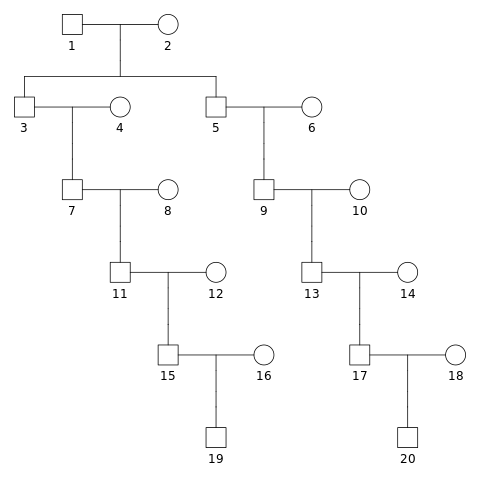

In [7]:
%%R

x = cousinPed(degree = 4)

plot(x)

Notice in the pedigree plot that each individual has an assigned number.

The assigned numbers for each individual is the identifier.

Here, I am adding children using the identifiers.

Note that nch is number of children.

Note that sex = 1 is male and sex = 2 is female.

Note that males are squares and females are circles.

Now that you have pedigree x, you can make adjustments. In this first adjustment, I am calling individual number 3 the father. I am calling individual number 4 the mother. Then I am adding 1 female child.

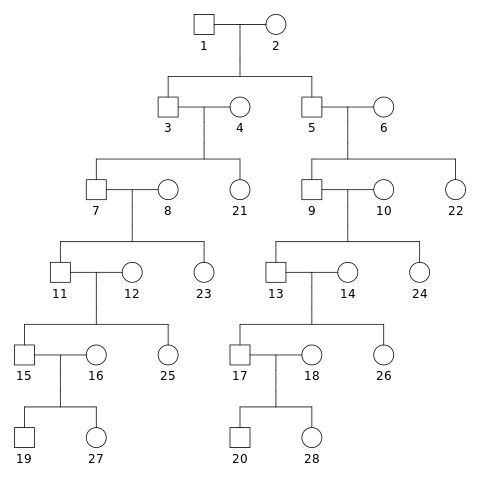

In [8]:
%%R

x = addChildren(x, father = 3, mother = 4, nch = 1, sex = 2)

x = addChildren(x, father = 5, mother = 6, nch = 1, sex = 2)
x = addChildren(x, father = 7, mother = 8, nch = 1, sex = 2)
x = addChildren(x, father = 9, mother = 10, nch = 1, sex = 2)
x = addChildren(x, father = 11, mother = 12, nch = 1, sex = 2)
x = addChildren(x, father = 13, mother = 14, nch = 1, sex = 2)
x = addChildren(x, father = 15, mother = 16, nch = 1, sex = 2)
x = addChildren(x, father = 17, mother = 18, nch = 1, sex = 2)

plot(x)

Notice how the pedigree changed. Take a moment to understand the changes that you made.

I continue to make adjustments until I get the pedigree I want.

Creating new father: 29
Creating new father: 31
Creating new father: 33
Creating new father: 35
Creating new father: 37
Creating new father: 39


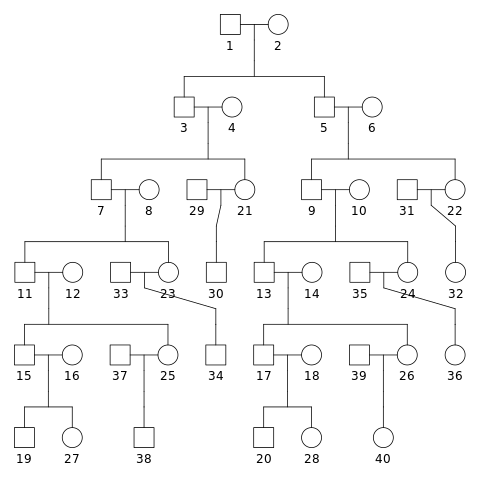

In [9]:
%%R

x = addChildren(x, mother = 21, nch = 1, sex = 1)
x = addChildren(x, mother = 22, nch = 1, sex = 2)
x = addChildren(x, mother = 23, nch = 1, sex = 1)
x = addChildren(x, mother = 24, nch = 1, sex = 2)

x = addChildren(x, mother = 25, nch = 1, sex = 1)
x = addChildren(x, mother = 26, nch = 1, sex = 2)

plot(x)

Creating new mother: 41
Creating new mother: 43
Creating new father: 45
Creating new father: 47


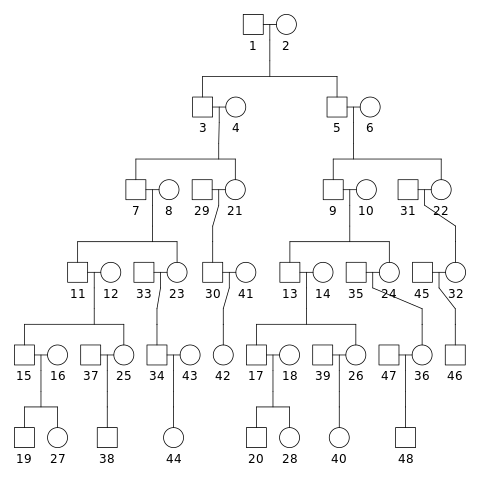

In [10]:
%%R

x = addChildren(x, father = 30, nch = 1, sex = 2)
x = addChildren(x, father = 34, nch = 1, sex = 2)
x = addChildren(x, mother = 32, nch = 1, sex = 1)
x = addChildren(x, mother = 36, nch = 1, sex = 1)

plot(x)

With this final adjustment, I have satisfied with the pedigree.

Creating new father: 49
Creating new mother: 51


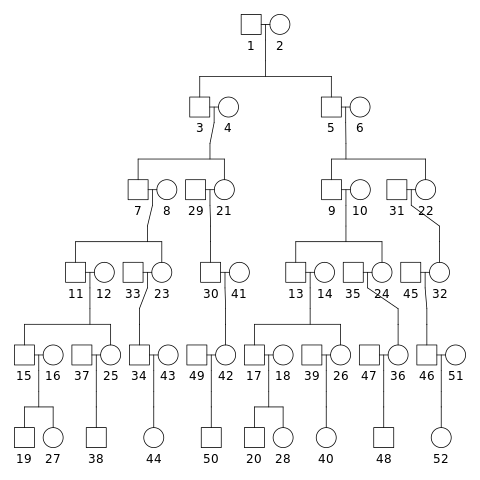

In [11]:
%%R

x = addChildren(x, mother = 42, nch = 1, sex = 1)
x = addChildren(x, father = 46, nch = 1, sex = 2)

plot(x)

Think about other adjustments that you could do. For example, how might you represent a man with three wives, each with a certain number of children?

In [12]:
%%R

# Print the pedigree to check the structure

print(x)

 id fid mid sex
  1   *   *   1
  2   *   *   2
  3   1   2   1
  4   *   *   2
  5   1   2   1
  6   *   *   2
  7   3   4   1
  8   *   *   2
  9   5   6   1
 10   *   *   2
 11   7   8   1
 12   *   *   2
 13   9  10   1
 14   *   *   2
 15  11  12   1
 16   *   *   2
 17  13  14   1
 18   *   *   2
 19  15  16   1
 20  17  18   1
 21   3   4   2
 22   5   6   2
 23   7   8   2
 24   9  10   2
 25  11  12   2
 26  13  14   2
 27  15  16   2
 28  17  18   2
 29   *   *   1
 30  29  21   1
 31   *   *   1
 32  31  22   2
 33   *   *   1
 34  33  23   1
 35   *   *   1
 36  35  24   2
 37   *   *   1
 38  37  25   1
 39   *   *   1
 40  39  26   2
 41   *   *   2
 42  30  41   2
 43   *   *   2
 44  34  43   2
 45   *   *   1
 46  45  32   1
 47   *   *   1
 48  47  36   1
 49   *   *   1
 50  49  42   1
 51   *   *   2
 52  46  51   2


In the output (you may need to select `scrollable element` or `text editor` to see the full output), you should see 52 rows. Each row represents one person in the tree you built. `id` is the individual identifier, `fid` is the father identifier and `mid` is the mother identifier. `sex` is the chromosomal sex where `1` = male and `2` = female.

Extract the genetic family tree created by pedsuite to a pandas dataframe.

In [13]:
%%R -o fam_df

# Extract data using indexing (modify indices if needed)
individual_id <- as.character(x$ID)
father_id <- ifelse(x$FIDX == "*", 0, x$FIDX)
mother_id <- ifelse(x$MIDX == "*", 0, x$MIDX)
sex <- as.character(x$SEX)

# Create data frame
fam_df <- data.frame(
  individual_id = individual_id,
  father_id = father_id,
  mother_id = mother_id,
  sex = sex
)

In the next cell, you are back to using Python. Inspect the dataframe to make sure that it looks as intended.

In [14]:
fam_df = fam_df.copy()
fam_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 1 to 52
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   individual_id  52 non-null     object
 1   father_id      52 non-null     int32 
 2   mother_id      52 non-null     int32 
 3   sex            52 non-null     object
dtypes: int32(2), object(2)
memory usage: 1.6+ KB


You should see `Index: 52 entries, 1 to 52`.

In [15]:
# Inspect the first 8 rows.
# Compare them to the pedsuite pedigree.
# (Note that we are using Python.)

fam_df.head(8)

,individual_id,father_id,mother_id,sex
1,1,0,0,1
2,2,0,0,2
3,3,1,2,1
4,4,0,0,2
5,5,1,2,1
6,6,0,0,2
7,7,3,4,1
8,8,0,0,2


Ped-sim needs a pedigree definition file, so let's go ahead and create that from the genetic family tree you created. (`FAM_ID` will be `FAM` for each person.)

`ped-sim` comes with example pedigree definition files for you to use. You can find them in your `~/use/pedsim/example` directory. To get a more detailed explanation of how to create a pedigree definiton file, see [Def file](https://github.com/williamslab/ped-sim?tab=readme-ov-file#def-file). You difine the pedigree using a text file. When doing so, make sure it is using the UNIX/OSX Format. I use [Notepad++](https://notepad-plus-plus.org/downloads/) for these purposes, but you are free to use whichever text editor you want.

In [16]:
# Rename the columns to match the required headers:
# FAM_ID, INDIV_ID, FATHER_ID, MOTHER_ID, SEX, PHENO
fam_df.rename(columns={
    "individual_id": "INDIV_ID",
    "father_id": "FATHER_ID",
    "mother_id": "MOTHER_ID",
    "sex": "SEX"
}, inplace=True)

fam_df["FAM_ID"] = "FAM"
fam_df["PHENO"] = -9

# Reorder columns if necessary
fam_df = fam_df[["FAM_ID", "INDIV_ID", "FATHER_ID", "MOTHER_ID", "SEX", "PHENO"]]

# Display the first few rows to verify
display(fam_df.head())

# Save the updated file without header and index, using tab separation
fam_df.to_csv(os.path.join(results_directory, "pedigree.fam"), sep="\t", index=False, header=False)

,FAM_ID,INDIV_ID,FATHER_ID,MOTHER_ID,SEX,PHENO
1,FAM,1,0,0,1,-9
2,FAM,2,0,0,2,-9
3,FAM,3,1,2,1,-9
4,FAM,4,0,0,2,-9
5,FAM,5,1,2,1,-9


In [17]:
!{utils_directory}/ped-sim/fam2def.py -i {results_directory}/pedigree.fam -o {results_directory}/pedigree.def

fam file, 'FAM' num individuals: 52
fam file, 'FAM' num founders: 22

def file, 'FAM' num individuals: 52
def file, 'FAM' num founder: 22


Take a look at your pedigree.def file in the results directory.

How many simulationed pedigrees do you want?

In a machine learning project, the answer would be as many as is needed to train your model well. For now, let's just try it out with `10`. When you run the next cell, a pop-up will appear for you to enter the number of pedigrees that you want.

In [19]:
# Get user input for the number of pedigrees
num_pedigrees = int(input("Enter the number of pedigrees to generate: "))

# Define input file path
input_def_file = os.path.join(results_directory, "pedigree.def")

# Read the file contents
with open(input_def_file, "r") as file:
    lines = file.readlines()

# Modify the first line (only changing the second value)
if lines[0].startswith("def"):
    parts = lines[0].split()  # Split the first line into parts
    parts[2] = str(num_pedigrees)  # Update only the second value
    lines[0] = " ".join(parts) + "\n"  # Reconstruct the modified line

# Write back to the file
with open(input_def_file, "w") as file:
    file.writelines(lines)

print(f"Updated {input_def_file} with num_pedigrees = {num_pedigrees}")

Updated /home/davenport/computational_genetic_genealogy/results/pedigree.def with num_pedigrees = 10


Take another look at your pedigree.def file in the results directory. The def line has changed to reflect the number of pedigrees you said you wanted.

## Ped-sim method

The Pedigree Simulator (Ped-sim) is a powerful tool for simulating pedigree structures that use sex-specific genetic maps and considers sex of the individual. To get it up and running on your system, you'll need to download and compile it in your computing space if it is not already there.

Here is the ped-sim GitHub page for your reference: [ped-sim](https://github.com/williamslab/ped-sim).

### Sex-specific Genetic Map

From [Map file](https://github.com/williamslab/ped-sim?tab=readme-ov-file#map-file-):

"The genetic map file contains three columns for a sex-averaged map and four columns if using male and female maps. The format of this file is:

`[chromosome] [physical_position] [map_position0] <map_position1>`

The chromosomes are expected to be listed in the same order as they are in any input VCF file, with the physical positions in increasing order. The chromosome names must also match the names in the input VCF file, and all chromosome names present in the map must also have corresponding records in the VCF.

[map_position0] is genetic position in centiMorgans, and should either be the sex-averaged genetic position if using only one map, or should be the male genetic position if using two maps. When using only one map, the simulator samples all crossovers from that one map and does not distinguish male and female parents.

<map_position1> is likewise a genetic position in centiMorgans and should correspond to the female genetic position if given.

A high resolution human sex-specific genetic map is available [here](https://github.com/cbherer/Bherer_etal_SexualDimorphismRecombination), and is described in [Bhérer et al. (2017)](https://www.nature.com/articles/ncomms14994). To generate an autosomal map file in the format the simulator requires with both male and female genetic positions, run the following bash commands:"

In [20]:
%%bash -s "$references_directory"

# Receive directory variables from Python
references_directory=$1

# genetic map for ped-sim

wget https://github.com/cbherer/Bherer_etal_SexualDimorphismRecombination/raw/master/Refined_genetic_map_b37.tar.gz -P $references_directory
tar xvzf $references_directory/Refined_genetic_map_b37.tar.gz -C $references_directory
printf "#chr\tpos\tmale_cM\tfemale_cM\n" > $references_directory/refined_mf_b37.simmap

# The paste command combines each line from the male chromosome file (male_chr$chr.txt)
# with the corresponding line from the female chromosome file (female_chr$chr.txt).
# They are combined side by side, separated by a tab.
for chr in {1..22}; do
  paste $references_directory/Refined_genetic_map_b37/male_chr$chr.txt $references_directory/Refined_genetic_map_b37/female_chr$chr.txt \
    | awk -v OFS="\t" 'NR > 1 && $2 == $6 {print $1,$2,$4,$8}' \
    | sed 's/^chr//' >> $references_directory/refined_mf_b37.simmap
done

rm $references_directory/Refined_genetic_map_b37.tar.gz
rm -r $references_directory/Refined_genetic_map_b37

# When you get the check mark indicating that the cell successfully completed its run,
# go ahead and clear the cell output.

# For the moment, you can igore:

# tar: Ignoring unknown extended header keyword 'SCHILY.dev'
# tar: Ignoring unknown extended header keyword 'SCHILY.ino'
# tar: Ignoring unknown extended header keyword 'SCHILY.nlink'

--2025-03-06 13:43:56--  https://github.com/cbherer/Bherer_etal_SexualDimorphismRecombination/raw/master/Refined_genetic_map_b37.tar.gz
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/cbherer/Bherer_etal_SexualDimorphismRecombination/master/Refined_genetic_map_b37.tar.gz [following]
--2025-03-06 13:43:56--  https://raw.githubusercontent.com/cbherer/Bherer_etal_SexualDimorphismRecombination/master/Refined_genetic_map_b37.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41278300 (39M) [application/octet-stream]
Saving to: ‘/home/davenport/computational_genetic_genealogy/references/Refined_ge

Refined_genetic_map_b37/
Refined_genetic_map_b37/female_chr1.txt
Refined_genetic_map_b37/female_chr10.txt
Refined_genetic_map_b37/female_chr11.txt


 37450K .......... .......... .......... .......... .......... 93%  599K 2s
 37500K .......... .......... .......... .......... .......... 93%  944K 2s
 37550K .......... .......... .......... .......... .......... 93% 1.04M 2s
 37600K .......... .......... .......... .......... .......... 93%  502K 2s
 37650K .......... .......... .......... .......... .......... 93%  905K 2s
 37700K .......... .......... .......... .......... .......... 93% 57.0M 2s
 37750K .......... .......... .......... .......... .......... 93% 58.9M 2s
 37800K .......... .......... .......... .......... .......... 93% 63.6M 2s
 37850K .......... .......... .......... .......... .......... 94% 55.8M 2s
 37900K .......... .......... .......... .......... .......... 94% 66.0M 2s
 37950K .......... .......... .......... .......... .......... 94% 59.3M 2s
 38000K .......... .......... .......... .......... .......... 94% 59.0M 2s
 38050K .......... .......... .......... .......... .......... 94% 66.5M 2s
 38100K ....

Refined_genetic_map_b37/female_chr12.txt
Refined_genetic_map_b37/female_chr13.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'
tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/female_chr14.txt


tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/female_chr15.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/female_chr16.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/female_chr17.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/female_chr18.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/female_chr19.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/female_chr2.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/female_chr20.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/female_chr21.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/female_chr22.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/female_chr3.txt


tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/female_chr4.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/female_chr5.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/female_chr6.txt
Refined_genetic_map_b37/female_chr7.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'
tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/female_chr8.txt


tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/female_chr9.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/female_chrX.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/male_chr1.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/male_chr10.txt


tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/male_chr11.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/male_chr12.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/male_chr13.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/male_chr14.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/male_chr15.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/male_chr16.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/male_chr17.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/male_chr18.txt


tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/male_chr19.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/male_chr2.txt


tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/male_chr20.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/male_chr21.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/male_chr22.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/male_chr3.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/male_chr4.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/male_chr5.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/male_chr6.txt


tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/male_chr7.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/male_chr8.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/male_chr9.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/sexavg_chr1.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/sexavg_chr10.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/sexavg_chr11.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/sexavg_chr12.txt


tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/sexavg_chr13.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/sexavg_chr14.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/sexavg_chr15.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/sexavg_chr16.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/sexavg_chr17.txt


tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/sexavg_chr18.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/sexavg_chr19.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/sexavg_chr2.txt


tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/sexavg_chr20.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/sexavg_chr21.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/sexavg_chr22.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/sexavg_chr3.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/sexavg_chr4.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/sexavg_chr5.txt


tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/sexavg_chr6.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/sexavg_chr7.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/sexavg_chr8.txt


tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


Refined_genetic_map_b37/sexavg_chr9.txt


tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'


You should now have the `refined_mf_b37.simmap` file in your references directory. Manually take a look at the file. It is a text file so you can use Notepad++ or your build-in text editor to view it.

The next two cells is used to convert the file from build 37 to build 38.

In [21]:
%%bash -s "$references_directory" "$utils_directory"

# Receive directory variables from Python
references_directory=$1
utils_directory=$2

# --- Convert the build 37 map to build 38 using liftOver ---

# Create a BED file from the build 37 simmap.
# The BED file requires 0-based start coordinates, so subtract 1 from the position.
awk 'NR>1 {print "chr"$1, $2-1, $2, $3, $4}' OFS="\t" $references_directory/refined_mf_b37.simmap > $references_directory/refined_mf_b37.bed

# Run liftOver to convert BED coordinates to build 38.
liftOver $references_directory/refined_mf_b37.bed \
         $references_directory/hg19ToHg38.over.chain.gz \
         $references_directory/refined_mf_b38.bed \
         $references_directory/refined_mf_b38.unmapped

# (Optional) Clean up temporary files
rm $references_directory/refined_mf_b37.bed

Reading liftover chains
Mapping coordinates


In [22]:
# Read the BED file
bed_file = os.path.join(references_directory, "refined_mf_b38.bed")
bed_data = pd.read_csv(bed_file, sep='\t', header=None)

# Rename columns for clarity
bed_data.columns = ['chr', 'start', 'pos', 'male_cM', 'female_cM']

# Clean chromosome names (remove 'chr' prefix)
bed_data['chr'] = bed_data['chr'].str.replace('chr', '', regex=True)

# Convert chromosome to numeric if possible
bed_data['chr'] = pd.to_numeric(bed_data['chr'], errors='coerce')

# Filter for chromosomes 1-22 and remove NaN values
mask = (bed_data['chr'] >= 1) & (bed_data['chr'] <= 22) & (bed_data['chr'].notna())
filtered_data = bed_data[mask].copy()  # Create a copy to avoid the warning

# Convert chromosome to integer after filtering out NaN values
filtered_data['chr'] = filtered_data['chr'].astype(int)

# Sort by chromosome (numerically) and position
sorted_data = filtered_data.sort_values(by=['chr', 'pos'])

# Keep only necessary columns
simmap_data = sorted_data[['chr', 'pos', 'male_cM', 'female_cM']]

# Print sample of data to verify
print("Sample of data to be saved:")
print(simmap_data.head())

# Save to simmap file with header
simmap_file = os.path.join(references_directory, "refined_mf_b38.simmap")
with open(simmap_file, 'w') as f:
    f.write("#chr\tpos\tmale_cM\tfemale_cM\n")
simmap_data.to_csv(simmap_file, sep='\t', index=False, header=False, mode='a')

print("Processing complete - chromosomes saved as integers.")

Sample of data to be saved:
   chr     pos   male_cM  female_cM
0    1  817341  0.000000   0.000000
1    1  841742  0.000197   0.003215
2    1  900119  0.000473   0.007541
3    1  983004  0.000796   0.008436
4    1  985353  0.000968   0.009608
Processing complete - chromosomes saved as integers.


## Run Ped-sim

Now you are ready to run ped-sim.

In [23]:
%%bash -s "$references_directory" "$utils_directory" "$results_directory"

# Receive directory variables from Python
references_directory=$1
utils_directory=$2
results_directory=$3
pedigree_definition_file="pedigree.def"
ped_sim_filename="ped_sim_run"

# Run ped-sim with parameters:

# -d: Specifies the path to the pedigree definition file.
# -m: Specifies the path to the genetic map file.
# -o: Specifies the prefix for the output files.
# --intf: Uses the interference crossover model
# --seed: Sets the random number generator seed to ensure reproducibility.
# --fam: Outputs the simulated data in PLINK's .fam format.
# --mrca: Outputs the most recent common ancestor (MRCA) of all sampled individuals.


# Notice that this uses the human crossover interference parameters stored in pedsim/interfere directory

${utils_directory}/ped-sim/ped-sim \
  -d $results_directory/$pedigree_definition_file \
  -m $references_directory/refined_mf_b38.simmap \
  -o $results_directory/$ped_sim_filename \
  --intf $utils_directory/ped-sim/interfere/nu_p_campbell.tsv \
  --seed 1234 \
  --fam \
  --mrca

# # using --pois instead of --intf
# # --pois: Uses the Poisson distribution to determine the number of crossovers.
# ./pedsim/ped-sim \
#   -d $util_directory/$pedigree_definition_file \
#   -m $references_directory/combined_genetic_map_b38.txt \
#   -o $results_directory/$ped_sim_filename \
#   --pois \
#   --seed 1234 \
#   --fam \
#   --mrca

Pedigree simulator!  v1.4.5    (Released 13 Dec 2024)

  Def file:		/home/davenport/computational_genetic_genealogy/results/pedigree.def
  Map file:		/home/davenport/computational_genetic_genealogy/references/refined_mf_b38.simmap
  Input VCF:		[none: no genetic data]
  Output prefix:	/home/davenport/computational_genetic_genealogy/results/ped_sim_run

  Random seed:		1234

  Interference file:	/home/davenport/computational_genetic_genealogy/utils/ped-sim/interfere/nu_p_campbell.tsv

Simulating haplotype transmissions... done.
Printing IBD segments and MRCAs... done.
Printing fam file... done.  (Do not use with PLINK data: see README.md)

To simulate genetic data, must use an input VCF with 220 founders.


**Let's take a look at the results.** 

Familiarize yourself with the different result files. Those are the ped_sim_run files in your results directory. Notice from the output of the above cell that if you wanted to simulate genotype data for this configuration, you would need to rerun the above cell with an input VCF with 220 founders (if you selected 10 pedigrees and the predefined pedigree). For now, we do not actually need the genotype itself. Using the IBD segment data (the .seg file) is sufficient.

## Graphing the results

In this run, we will first define the graph function, then call the function to create our graph.

**Define the graph function.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import os

def graph_fam_file_simulated(filename, pedigree=None):
    fam_file = pd.read_csv(os.path.join(results_directory, filename), sep=" ", header=None)
    fam_file.columns = ["fam", "id", "parent0", "parent1", "sex", "phenotype"]

    if pedigree is not None:

        # Extract pedigree number from the first element
        fam_file['pedigree_num'] = fam_file['fam'].apply(lambda x: x.replace("FAM", ""))
        fam_file = fam_file[fam_file['pedigree_num'] == str(pedigree)]

    fig = plt.figure(num=None, figsize=(250, 100), dpi=100)

    G = nx.DiGraph()

    for index, row in fam_file.iterrows():
        id = row['id']

        values_id1 = id.split("_")
        
        # Ensure the ID follows expected format
        if len(values_id1) < 2:
            raise ValueError(f"Unexpected ID format: {id} -> {values_id1}")
        
        subvalues_id1 = values_id1[1].split("-")
        gen_id1 = int(subvalues_id1[0].lstrip("g"))

        G.add_node(id, time=gen_id1)

        for parent_column in ['parent0', 'parent1']:
            if row[parent_column] != '0':
                parent_id = row[parent_column]
                values_parent = parent_id.split("_")

                if len(values_parent) < 2:
                    raise ValueError(f"Unexpected Parent format: {parent_id} -> {values_parent}")

                subvalues_parent = values_parent[1].split("-")
                gen_parent = int(subvalues_parent[0].lstrip("g"))
                G.add_node(parent_id, time=gen_parent)
                G.add_edge(parent_id, id)

    # Reverse the order of generations
    max_gen = max(gen_id1 for _, gen_id1 in G.nodes(data='time'))
    for node, data in G.nodes(data=True):
        data['time'] = max_gen - data['time']

    return G

**Call the graph function.**

In [ ]:
G1 = graph_fam_file_simulated("ped_sim_run-everyone.fam")
pos = nx.multipartite_layout(G1, subset_key="time", align="horizontal", scale=50)
nx.draw_networkx(G1, pos, node_size=3000, with_labels=True, arrows=False)
ped_sim_plot_filename = f"{results_directory}/diagram_ped_sim_pedigree.svg"
# plt.title("Ped-Sim Pedigree")
plt.savefig(ped_sim_plot_filename, bbox_inches = 'tight', pad_inches = 0)

In the output, you will see a depiction of all 10 pedigrees (also saved in your results directory as a `diagram_ped_sim_pedigree.svg`). You should see five rows of blue dots. These are the six generations specified in the pedigree definition file. But perhaps it's a little difficult to see what's going on in the output. Let's take a look at just one of the pedigrees.

In [ ]:
pedigree_num = 1
G2 = graph_fam_file_simulated("ped_sim_run-everyone.fam", pedigree = pedigree_num)
pos = nx.multipartite_layout(G2, subset_key="time", align="horizontal", scale=50)
nx.draw_networkx(G2, pos, node_size=3000, with_labels=True, arrows=False)
ped_sim_plot_filename = f"{results_directory}/diagram_ped_sim_pedigree_{pedigree_num}.svg"
plt.savefig(ped_sim_plot_filename, bbox_inches='tight', pad_inches=0)

That's better. Now we can see what one of the pedigrees look like.

Each node (blue circle) is a person. Each edge (line) represents one generation.

Can you identify:
- full siblings
- first cousins
- second cousins
- third cousins
- parents
- grandparents
- great grandparents
- 2x great grandparents
- aunt/uncle (avuncular)

## Segments

Now, let's look at the segment data and build our data table.

In [ ]:
segments = pd.read_csv(os.path.join(results_directory, "ped_sim_run2.seg"), sep="\t", header = None)
segments.head()

Notice the column headers are not very informative. Let's change that.

In [ ]:
segments.columns = (["id1", "id2", "chromosome", "physical_position_start", "physical_position_end", "IBD_type", "genetic_position_start", "genetic_position_end", "genetic_length"])
segments.head()

In [ ]:
segments.info()

In [ ]:
# Get the unique values
segments['IBD_type'].unique()

In [ ]:
segments['chromosome'].unique()

In [ ]:
# Get data descriptives
segments['genetic_length'].describe()

In [ ]:
# Get the DNA segment minimum genetic length

min_segment_size = float(segments['genetic_length'].min())

print(f"The minimum segment size is {min_segment_size:.6f} cM.")

In reality, we would not work with DNA segments smaller than what we can accurately detect. The IBD detection algorithms we use can accurately detect IBD segments at a minimum of 2 cM (e.g., Refined IBD). Let's conservatively filter the segment such that we use only the segments with a minimum of 3 cM.

In [ ]:
# Subset your data.
# Get only the segments with a genetic length of at least 3 cM.

filtered_segments = segments[segments['genetic_length'] >= 3]
filtered_segments.info()

In [ ]:
# Get data descriptives
filtered_segments['genetic_length'].describe()

Compare the descriptive output of the full dataset and the subsetted dataset.

You can use other filtering conditions if you want. For example, you could filter the segments between 10 and 50 cM inclusively.

In [ ]:
filtered_segments_50_10 = segments[(segments['genetic_length'] >= 10) & (segments['genetic_length'] <= 50)]
filtered_segments_50_10.info()

In [ ]:
filtered_segments_50_10['genetic_length'].describe()

Let's create a summary pandas dataframe called relationships based on the segment data. Instead of having a row for each segment, this dataframe will summarize the shared segments for each unique pair.

In [ ]:
# Create the relationships dataframe for simulated data

def segment_position(x, position):
    sorted_values = x.sort_values(ascending=False)
    if len(sorted_values) < position:
        return 0
    return sorted_values.iloc[position - 1]

relationships = filtered_segments.groupby(['id1', 'id2']).agg(
    num_seg=('id1', 'size'),
    total_shared=('genetic_length', 'sum'),
    max_seg=('genetic_length', 'max'),
    second_seg=('genetic_length', lambda x: segment_position(x, 2)),
    third_seg=('genetic_length', lambda x: segment_position(x, 3)),
    fourth_seg=('genetic_length', lambda x: segment_position(x, 4)),
).reset_index()

relationships.head()

In [ ]:
relationships.info()

In [ ]:
updated_relationships = relationships.copy()  # Create a copy of the relationships DataFrame

def get_relationships(row):
    common_ancestors = nx.lowest_common_ancestor(G1, row['id1'], row['id2'])
    path_lengths1 = nx.shortest_path_length(G1, source=common_ancestors, target=row['id1'])
    path_lengths2 = nx.shortest_path_length(G1, source=common_ancestors, target=row['id2'])
    return str((path_lengths1, path_lengths2))

with tqdm(total=len(updated_relationships), desc="Processing relationships") as progress_bar:
    for index, row in updated_relationships.iterrows():
        updated_relationships.loc[index, 'genealogical_relationship'] = get_relationships(row)
        progress_bar.update()

updated_relationships.head()

In the updated relationships dataframe, each row represents an unique pair. It also has the total number of segments shared in the pair, total amount of DNA (minimum of 3 cM), and largest 4 segment (cM). You'll also see a genealogical_relationship column where the value is a tuple. In the tuple, the first value is the number of generations from id1 to the shared ancestor, and the second value is the number of generations from id2 and the shared ancestor. For example, (2, 1) means that there is 2 generations between id1 and the shared ancestor and 1 generation between id2 and the shared ancestor. A genealogical_relationship of (1, 1) is full siblings (i.e., siblings sharing both biological parents). A value of 0 means "self", indicating that self is the ancestor of the other person. For example, (0, 1) means that id1 is the parent of id2. In another example, (2, 0) means that id1 is the grandchild of id2.

In [ ]:
updated_relationships.info()

In [ ]:
updated_relationships.describe()

In the next cell, we will add column meiotic_distance. Meiotic distance is the number of meioses separating the members of the pair. It is calculated by summing the values in the genealogical_relationship tuple.

In [ ]:
import ast

updated_relationships['genealogical_relationship'] = updated_relationships['genealogical_relationship'].apply(ast.literal_eval)
updated_relationships['meiotic_distance'] = updated_relationships['genealogical_relationship'].apply(lambda x: sum(x) if isinstance(x, tuple) else "")

updated_relationships.head()

In [ ]:
updated_relationships.to_csv(os.path.join(results_directory, "relationships.csv"), sep="\t", index=False)

# Manually confirm that your relationships.csv file is in your results directory.

In [ ]:
updated_relationships.describe()

In [ ]:
print(updated_relationships['genealogical_relationship'].value_counts())
print("\n")
print(f"There are {len(updated_relationships['genealogical_relationship'].unique())} different relationship groups among the sampled individuals in this pedigree.")

Let's explore some descriptives of DNA sharing (min 3 cM segment) at the various relationship levels.

In [ ]:
updated_relationships.drop([
    "id1", "id2",
    "second_seg", "third_seg",
    "meiotic_distance"
    ], axis=1).groupby("genealogical_relationship").agg(['count', 'mean', 'std', 'min', 'max'])

### Additional Exploration

In [ ]:
# Read the saved csv file as a Pandas dataframe, replacing the previously saved `relationships` value.
relationships = pd.read_csv(os.path.join(results_directory, "relationships.csv"), sep = "\t")

relationships.head()

In [ ]:
relationships.info()

In [ ]:
sns.scatterplot(data=relationships, y='meiotic_distance', x='max_seg')
plt.xlabel('Max Segment Length')
plt.ylabel('Genealogical Distance')
plt.title('Scatter Plot: Genealogical Distance vs Max Segment Length')
plt.show()

In [ ]:
sns.scatterplot(data=relationships, y='meiotic_distance', x='num_seg')
plt.xlabel('Number of Segments')
plt.ylabel('Genealogical Distance')
plt.title('Scatter Plot: Genealogical Distance vs Number of Segments')
plt.show()

In [ ]:
sns.kdeplot(data=relationships, x='max_seg', y='meiotic_distance', cmap='viridis', fill=True)
plt.xlabel('Max Segment Length')
plt.ylabel('Genealogical Distance (generations)')
plt.title('Density Plot: Max Segment Length vs Genealogical Relationship')

# Set the y-axis tick labels based on the range of meiotic_distance
gg_distance_values = sorted(relationships['meiotic_distance'].unique())
plt.yticks(gg_distance_values, gg_distance_values)
plt.show()

In [ ]:
sns.kdeplot(data=relationships, x='num_seg', y='meiotic_distance', cmap='viridis', fill=True)
plt.xlabel('Number of Segments')
plt.ylabel('Genealogical Distance (generations)')
plt.title('Density Plot: Number of Segments vs Genealogical Relationship')

# Set the y-axis tick labels based on the range of meiotic_distance
gg_distance_values = sorted(relationships['meiotic_distance'].unique())
plt.yticks(gg_distance_values, gg_distance_values)
plt.show()

In [ ]:
# Get the average segment size for each pair
relationships["average_segment_size"] = relationships["total_shared"] / relationships["num_seg"]

relationships.head()

Let's take a look at the average segment size for each meiotic distance.

In [ ]:
relationships.groupby('meiotic_distance')['average_segment_size'].mean()

Notice that the average segment size decreases as the meiotic distance between members of a pair increases.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(
    data=relationships,
    x='average_segment_size',
    y='meiotic_distance',
    cmap='viridis',
    fill=True
)

plt.xlabel('Average Segment Size')
plt.ylabel('Genealogical Distance (generations)')
plt.title('KDE Plot: Average Segment Size vs Genealogical Distance')
plt.show()

You should notice that overall, the methods we have used in our exploration is not a predictor of genetic genealogical relationships beyond 1 or 2 generations. For that, we turn to machine learning.

# Integrating Input VCF Files in Ped-Sim for Simulated Segments and Genotype Data

Now, let's incorporate an input VCF file into **Ped-Sim** so that it can generate both **IBD segments** and **genotype data** for our simulated dataset. 

At this point, you might wonder:  
*"If we are already providing genotype data as input, why do we need Ped-Sim to generate simulated genotype data?"*  

This is an excellent question! The key reason lies in how **Ped-Sim** handles the simulation process. While we are indeed providing real genotype data as input, this data serves a very specific purpose:  

- **Founder Selection**: Ped-Sim does not randomly generate all genotypes from scratch. Instead, it selects the **founders** (the first generation in the genetic family tree) **from the input genotype data**. These founders form the genetic starting point for the simulated family tree.  

- **Genetic Inheritance Simulation**: Once the founders are selected, Ped-Sim simulates the inheritance of genetic material across generations, introducing **recombination and inheritance patterns** that mirror real biological processes. This step ensures that the offspring in the simulated dataset inherit realistic genotype segments, following expected Mendelian inheritance rules.

- **Generating IBD Segments**: Ped-Sim tracks how segments of DNA are passed down through generations, allowing us to analyze patterns of **identical-by-descent (IBD) sharing** among related individuals. These IBD segments are crucial for applications such as reconstructing family trees, studying relatedness, and making inferences about historical demography.

Thus, even though we already have genotype data as input, that data does not represent a pedigree or the inheritance of genetic material across generations. Ped-Sim constructs a multi-generational genetic family tree by simulating how genetic material is passed down, using the genotype data we provide for founders. Through this process, it applies recombination and transmission patterns to produce a dataset that reflects realistic genealogical relationships.

Now that we understand the purpose of including an input VCF file, let's proceed with configuring Ped-Sim to use it effectively.

#### Get the data:

Make sure you are using a single VCF file with all chromosomes 1 - 22 (and X if needed). If you don't have this file already, go to Lab4 and run the `Concat the by-chromosome files` section. (You will need to run all the previous cells that this section depends on (e.g., importing packages, defining directory variables)).

Go back up to the output for the first ped-sim run. Do you see the towards the end where it says:

"To simulate genetic data, must use an input VCF with [number] founders."

This tells us the number of individuals that need to be in our input vcf file for ped-sim to simulate the genetic family tree(s) that we defined earlier. Let's check the sample size of our input VCF.

In [ ]:
%%bash
# Define the input and output VCF files
input_vcf=${RESULTS_DIRECTORY}/merged_opensnps_autosomes.vcf.gz

echo "Input sample size:" $(bcftools query -l ${input_vcf} | wc -l)

Your sample size should equal or exceed the required number of founders for the simulation.

If this is not the case, you can address this in a couple of ways.
1. Revise your pedigree definition file such that you have an adequate sample size.

   **or**

2. Increase the sample size in your input VCF file. (This may require you downloading more data. You can use Lab0_Get_OpenSNP_data for that.)

## Pruning the Data is Essential for Ped-Sim Simulations

Pruning the data is an important preprocessing step to ensure this, and here’s why:

### 1. Ensuring Independent Founders

- **Selection of Distantly Related Founders**:  
  Ped-Sim selects founders from the input genotype data to form the basis of the simulated pedigree. If the dataset includes close relatives, the chosen founders may share too much genetic material, which undermines the assumption that they are independent. Pruning helps remove these close relatives, ensuring that the founders represent distinct genetic backgrounds.

### 2. Preserving Genetic Diversity

- **Avoiding Redundancy**:  
  Close relatives have overlapping haplotypes, and their presence can lead to over-representation of certain genetic segments. By pruning out closely related individuals, you maintain greater genetic diversity among the founders, which is critical for accurately simulating recombination and inheritance patterns over generations.

### 3. Enhancing Simulation Accuracy

- **Realistic Pedigree Structure**:  
  Using a pruned dataset allows Ped-Sim to generate a more realistic simulation of genetic inheritance. The process of recombination and the resulting distribution of genetic segments are better modeled when the founders are not overly similar, resulting in more accurate downstream analyses (e.g., identity-by-descent mapping).

### References

1. **Ped-Sim Documentation**: Detailed explanation of the simulation process and the importance of high-quality input data.
2. **Purcell, S., et al. (2007).** [PLINK: A tool set for whole-genome association and population-based linkage analyses.](https://doi.org/10.1086/519795)
3. **Manichaikul, A., et al. (2010).** [Robust relationship inference in genome-wide association studies.](https://doi.org/10.1093/bioinformatics/btq559)
4. **Weir, B. S. (1996).** *Genetic Data Analysis II: Methods for Discrete Population Genetic Data.*

By pruning your input genotype data, you ensure that the founders selected for Ped-Sim are as independent as possible, leading to a more realistic and robust simulation of multi-generational genetic inheritance.

In [ ]:
%%bash
# Define the input and output VCF files
input_vcf=${RESULTS_DIRECTORY}/merged_opensnps_autosomes.vcf.gz
output_vcf=${RESULTS_DIRECTORY}/merged_opensnps_autosomes_pruned

# Step 1: Convert the VCF file to PLINK binary format (BED/BIM/FAM)
plink2 --vcf ${input_vcf} --make-bed --out dataset

# Step 2: Remove close relatives using a KING cutoff of 0.125.
# The threshold 0.125 corresponds roughly to the expected kinship coefficient for first cousins.
plink2 --bfile dataset --king-cutoff 0.125 --make-bed --out dataset_unrelated

# Step 3: Convert the filtered, unrelated dataset back to VCF format
plink2 --bfile dataset_unrelated --export vcf --out ${output_vcf}

# Step 4: Compress the VCF file using bgzip and index it using tabix
bgzip -c ${output_vcf}.vcf > ${output_vcf}.vcf.gz
tabix -p vcf ${output_vcf}.vcf.gz
rm ${output_vcf}.vcf



In [ ]:
%%bash

output_vcf=${RESULTS_DIRECTORY}/merged_opensnps_autosomes_pruned

# Step 5: Use bcftools to report the sample size in both the output VCF files.
echo "Output sample size:" $(bcftools query -l ${output_vcf}.vcf.gz | wc -l)

In the cell above, you want to make sure that your sample size equals or exceeds the number of founders needed for your pedigree definition.

In [ ]:
%%bash

sample_file="merged_opensnps"

INPUT_PRUNED_VCF=${RESULTS_DIRECTORY}/merged_opensnps_autosomes_pruned.vcf.gz

for chr in {1..22}; do
    
    plink2 --vcf ${INPUT_PRUNED_VCF} \
           --chr ${chr} \
           --export vcf bgz \
           --out ${RESULTS_DIRECTORY}/unphased_samples/merged_opensnps_pruned_chr${chr}
done

In [ ]:
%%bash

sample_file="merged_opensnps"
beagle="${UTILS_DIRECTORY}/beagle.17Dec24.224.jar"

# Phase chromosomes using Beagle
for chr in {1..22}; do
    echo "Processing chromosome $chr"

    INPUT_VCF="${RESULTS_DIRECTORY}/unphased_samples/merged_opensnps_pruned_chr${chr}.vcf.gz"
    REF_VCF="${REFERENCES_DIRECTORY}/onethousandgenomes_genotype/onethousandgenomes_genotyped_phased.chr${chr}.vcf.gz"
    MAP_FILE="${REFERENCES_DIRECTORY}/genetic_maps/beagle_genetic_maps/plink.chr${chr}.GRCh38.map"
    OUTPUT_PREFIX="${RESULTS_DIRECTORY}/phased_samples/merged_opensnps_pruned_chr${chr}"
    PHASED_VCF="${OUTPUT_PREFIX}.vcf.gz"
    TEMP_VCF="${RESULTS_DIRECTORY}/phased_samples/temp_pruned_chr${chr}.vcf.gz"
    SORTED_VCF="${RESULTS_DIRECTORY}/phased_samples/merged_opensnps_pruned_phased_chr${chr}_sorted.vcf.gz"

    # Check if input VCF exists
    if [ ! -f "$INPUT_VCF" ]; then
        echo "Input VCF file not found for chromosome $chr. Skipping."
        echo "$INPUT_VCF"
        continue
    fi

    # Run Beagle phasing
    if [ -f "$REF_VCF" ]; then
        echo "Running Beagle with reference panel for chromosome $chr"
        java -jar ${beagle} \
            gt="$INPUT_VCF" \
            ref="$REF_VCF" \
            map="$MAP_FILE" \
            out="$OUTPUT_PREFIX" || {
                echo "Beagle failed for chromosome $chr. Skipping."
                continue
            }
    else
        echo "Running Beagle without reference panel for chromosome $chr"
        java -jar ${beagle} \
            gt="$INPUT_VCF" \
            map="$MAP_FILE" \
            out="$OUTPUT_PREFIX" || {
                echo "Beagle failed for chromosome $chr. Skipping."
                continue
            }
    fi

    if [ ! -f "$PHASED_VCF" ]; then
        echo "Phasing failed for chromosome $chr. Output file not found. Skipping."
        continue
    fi

    # Index the file
    tabix -f -p vcf "$PHASED_VCF"
    
    # Add INFO field definition and sort
    echo "Sorting VCF for chromosome $chr"
    bcftools annotate --header-lines <(echo '##INFO=<ID=END,Number=1,Type=Integer,Description="End position of the variant">') "$PHASED_VCF" | \
    bcftools sort -Oz -o "$SORTED_VCF" || {
        echo "Sorting failed for chromosome $chr"
        continue
    }

    # Index the sorted file
    tabix -f -p vcf "$SORTED_VCF"
    
    # If the sorted vcf and index exists, remove phased vcf and index
    if [ -f "$SORTED_VCF" ] && [ -f "$SORTED_VCF.tbi" ]; then
        rm -f "$PHASED_VCF"
        rm -f "$PHASED_VCF.tbi"
    fi
done

In [ ]:
%%bash

echo "Results Directory: $RESULTS_DIRECTORY"

phased_directory="${RESULTS_DIRECTORY}/phased_samples"
merged_vcf="${RESULTS_DIRECTORY}/merged_opensnps_autosomes_pruned.vcf.gz"

# List of sorted VCFs
vcf_list=()
for CHR in {1..22}; do
    SORTED_VCF="${RESULTS_DIRECTORY}/phased_samples/merged_opensnps_pruned_phased_chr${CHR}_sorted.vcf.gz"
    if [ -f "$SORTED_VCF" ]; then
        vcf_list+=("$SORTED_VCF")
    else
        echo "Missing sorted VCF for chromosome $CHR, skipping."
        echo "Missing $SORTED_VCF"
    fi
done

# Merge all VCFs
if [ ${#vcf_list[@]} -gt 0 ]; then
    echo "Merging phased VCFs into a single autosomal file..."
    bcftools concat -Oz -o "$merged_vcf" "${vcf_list[@]}" || { echo "Merging failed."; exit 1; }

    # Index the merged VCF
    tabix -f -p vcf "$merged_vcf"
    echo "Merged VCF created at $merged_vcf"
else
    echo "No VCFs available for merging."
fi


From the ped-sim documentation: 

> When genetic data are needed, an input VCF is required to be provided with the -i option. Given such a VCF, Ped-sim randomly samples individuals from this data and uses them as founders. The VCF must contain phased data for all individuals, with no missing data for any site. As most phasers automatically impute missing data, the latter requirement should be to easy to meet.
> The input VCF file can be gzipped, and if it is, Ped-sim prints the output VCF in gzipped format (but this output VCF is not bgzipped)."

In [ ]:
%%bash

pedigree_definition_file="pedigree.def"
ped_sim_filename="ped_sim_run2"

${UTILS_DIRECTORY}/ped-sim/ped-sim \
    -d ${RESULTS_DIRECTORY}/$pedigree_definition_file \
    -m ${REFERENCES_DIRECTORY}/refined_mf_b38.simmap \
    -o ${RESULTS_DIRECTORY}/$ped_sim_filename \
    -i ${RESULTS_DIRECTORY}/merged_opensnps_autosomes_pruned.vcf.gz \
    --intf ${UTILS_DIRECTORY}/ped-sim/interfere/nu_p_campbell.tsv \
    --seed 1234 \
    --fam \
    --mrca
    


Let's view the stats on our new VCF file with simulated genotype data from our defined pedigree.

In [ ]:
%%bash

phased_directory="${RESULTS_DIRECTORY}/phased_samples"
PHASED_VCF="${RESULTS_DIRECTORY}/ped_sim_run2.vcf.gz"
STATS_OUTPUT="${phased_directory}/ped_sim_run2_stats.vchk"

bcftools stats -s - "$PHASED_VCF" > "$STATS_OUTPUT"
bcftools stats -s - "$PHASED_VCF"

Now we have (1) the genetic family tree fam file, (2) the VCF file of the defined sample, and (3) the segment file for our defined genetic family tree, we can use this as a ground truth to test our genomic analysis tools or conduct full experiments.

Create a set of by-chromosome files

In [ ]:
%%bash

# Define the input VCF file
input_vcf="${RESULTS_DIRECTORY}/ped_sim_run2.vcf.gz"

# Create the output directory if it doesn't exist
mkdir -p ${RESULTS_DIRECTORY}/ped_sim_run2_autosomes/unphased_samples/

# Loop through each chromosome and create separate files
for chr in {1..22}; do
    plink2 --vcf ${input_vcf} \
           --chr ${chr} \
           --export vcf bgz \
           --out ${RESULTS_DIRECTORY}/ped_sim_run2_autosomes/unphased_samples/ped_sim_run2_chr${chr}
done

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import os

def graph_fam_file_simulated(filename, pedigree=None):
    fam_file = pd.read_csv(os.path.join(results_directory, filename), sep=" ", header=None)
    fam_file.columns = ["fam", "id", "parent0", "parent1", "sex", "phenotype"]

    if pedigree is not None:
        # Extract pedigree number from the first element
        fam_file['pedigree_num'] = fam_file['fam'].apply(lambda x: x.replace("FAM", ""))
        fam_file = fam_file[fam_file['pedigree_num'] == str(pedigree)]

    fig = plt.figure(num=None, figsize=(250, 100), dpi=100)

    G = nx.DiGraph()

    for index, row in fam_file.iterrows():
        id = row['id']

        values_id1 = id.split("_")
        
        # Ensure the ID follows expected format
        if len(values_id1) < 2:
            raise ValueError(f"Unexpected ID format: {id} -> {values_id1}")
        
        subvalues_id1 = values_id1[1].split("-")
        gen_id1 = int(subvalues_id1[0].lstrip("g"))

        G.add_node(id, time=gen_id1)

        for parent_column in ['parent0', 'parent1']:
            if row[parent_column] != '0':
                parent_id = row[parent_column]
                values_parent = parent_id.split("_")

                if len(values_parent) < 2:
                    raise ValueError(f"Unexpected Parent format: {parent_id} -> {values_parent}")

                subvalues_parent = values_parent[1].split("-")
                gen_parent = int(subvalues_parent[0].lstrip("g"))
                G.add_node(parent_id, time=gen_parent)
                G.add_edge(parent_id, id)

    # Reverse the order of generations
    max_gen = max(gen_id1 for _, gen_id1 in G.nodes(data='time'))
    for node, data in G.nodes(data=True):
        data['time'] = max_gen - data['time']

    return G

def find_common_ancestors(G, person1, person2):
    """
    Find all common ancestors between two individuals in a family tree.
    Returns a set of common ancestors.
    """
    # Create a new graph with edges reversed to trace ancestors
    G_reversed = G.reverse()
    
    # Find all ancestors for each person (including the person themselves)
    ancestors1 = set(nx.dfs_preorder_nodes(G_reversed, person1))
    ancestors2 = set(nx.dfs_preorder_nodes(G_reversed, person2))
    
    # Find common ancestors
    common_ancestors = ancestors1.intersection(ancestors2)
    
    return common_ancestors

def find_most_recent_common_ancestor(G, person1, person2):
    """
    Find the most recent common ancestor (MRCA) between two individuals.
    Returns the MRCA and the generation distance to each person.
    """
    common_ancestors = find_common_ancestors(G, person1, person2)
    
    if not common_ancestors:
        return None, None, None
    
    # Find the MRCA (the one with the highest generation number)
    mrca = max(common_ancestors, key=lambda x: G.nodes[x]['time'])
    
    # Calculate genealogical distance (number of generations)
    # We need to use the original graph direction for descendants
    path_to_person1 = nx.shortest_path(G, source=mrca, target=person1)
    path_to_person2 = nx.shortest_path(G, source=mrca, target=person2)
    
    return mrca, len(path_to_person1) - 1, len(path_to_person2) - 1

def calculate_relationship_degree(G, person1, person2):
    """
    Calculate the canonical genealogical relationship degree between two individuals.
    
    Returns:
    - mrca: Most recent common ancestor
    - degree1: Degrees from mrca to person1
    - degree2: Degrees from mrca to person2
    - total_degree: Sum of degrees (traditional 'degree of relationship')
    - canonical_degree: Min(degree1, degree2) for same-generation relationships
    - relationship_type: Description of the relationship
    """
    # Special case for same person
    if person1 == person2:
        return {
            'mrca': person1,
            'degree1': 0,
            'degree2': 0,
            'total_degree': 0,
            'canonical_degree': 0,
            'relationship_type': 'self'}
    
    # Find MRCA and genealogical distances
    mrca, degree1, degree2 = find_most_recent_common_ancestor(G, person1, person2)
    
    if mrca is None:
        return {
            'mrca': None,
            'degree1': None,
            'degree2': None,
            'total_degree': None,
            'canonical_degree': None,
            'relationship_type': 'unrelated'}
    
    total_degree = degree1 + degree2
    canonical_degree = min(degree1, degree2)
    
    # Determine relationship type
    relationship_type = "unknown"
    
    # Direct lineage
    if degree1 == 0 or degree2 == 0:
        if degree1 == 0:  # person1 is ancestor of person2
            if degree2 == 1:
                relationship_type = "parent-child"
            elif degree2 == 2:
                relationship_type = "grandparent-grandchild"
            else:
                relationship_type = f"{degree2-1}x great-grandparent/grandchild"
        else:  # person2 is ancestor of person1
            if degree1 == 1:
                relationship_type = "parent-child"
            elif degree1 == 2:
                relationship_type = "grandparent-grandchild"
            else:
                relationship_type = f"{degree1-1}x great-grandparent/grandchild"
    
    # Same generation (siblings, cousins)
    elif degree1 == degree2:
        if degree1 == 1:
            relationship_type = "siblings"
        else:
            relationship_type = f"{degree1-1}th cousins"
    
    # Different generation but not direct lineage (uncle/aunt, etc.)
    else:
        min_degree = min(degree1, degree2)
        diff = abs(degree1 - degree2)
        
        if min_degree == 1:
            if diff == 1:
                relationship_type = "uncle/aunt - nephew/niece"
            else:
                relationship_type = f"{diff-1}x great-uncle/aunt - nephew/niece"
        else:
            relationship_type = f"{min_degree-1}th cousins {diff} times removed"
    
    return {
        'mrca': mrca,
        'degree1': degree1,
        'degree2': degree2,
        'total_degree': total_degree,
        'canonical_degree': canonical_degree,
        'relationship_type': relationship_type}

def analyze_family_relationships(G, root_person=None):
    """
    Analyze all familial relationships in a family tree.
    
    Parameters:
    - G: NetworkX DiGraph representing the family tree
    - root_person: Optional focal person for the analysis
    
    Returns a dictionary of relationships
    """
    if root_person is None:
        # Find a person who might be a good central figure (has many connections)
        root_person = max(G.nodes(), key=lambda x: G.degree(x))
    
    relationships = {}
    nodes = list(G.nodes())
    
    for i, person1 in enumerate(nodes):
        if person1 == root_person:
            continue
            
        relationship = calculate_relationship_degree(G, root_person, person1)
        relationships[person1] = relationship
    
    return relationships, root_person

def visualize_family_tree_with_relationships(G, root_person=None, output_file=None):
    """
    Visualize a family tree with relationship information.
    """
    # Analyze relationships
    relationships, analyzed_root = analyze_family_relationships(G, root_person)
    
    # Set up the plot
    plt.figure(figsize=(20, 10))
    
    # Position nodes using a hierarchical layout based on generation time
    pos = nx.multipartite_layout(G, subset_key='time', align='horizontal')
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=100)
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, edge_color='black', arrows=True)
    
    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=8)
    
    # Display relationship information
    print(f"Relationship analysis for person: {analyzed_root}")
    print("-" * 50)
    
    for person, rel in relationships.items():
        if rel['mrca'] is not None:
            print(f"{person}: {rel['relationship_type']}")
            print(f"  MRCA: {rel['mrca']}")
            print(f"  Degrees from MRCA to {analyzed_root}: {rel['degree1']}")
            print(f"  Degrees from MRCA to {person}: {rel['degree2']}")
            print(f"  Total degree of relationship: {rel['total_degree']}")
            print("")
    
    # Save or display the figure
    if output_file:
        plt.savefig(output_file, bbox_inches='tight')
        plt.close()
    else:
        plt.show()
    
    return relationships

# Usage example:
input_file = os.path.join(results_directory, 'ped_sim_run-everyone.fam')
output_file = os.path.join(results_directory, 'family_with_relationships.png')
G = graph_fam_file_simulated(input_file, pedigree=1)
relationships = visualize_family_tree_with_relationships(G, output_file=output_file)

Relationship analysis for person: FAM1_g2-b1-i1
--------------------------------------------------
FAM1_g1-b1-s1: parent-child
  MRCA: FAM1_g1-b1-s1
  Degrees from MRCA to FAM1_g2-b1-i1: 1
  Degrees from MRCA to FAM1_g1-b1-s1: 0
  Total degree of relationship: 1

FAM1_g1-b1-i1: parent-child
  MRCA: FAM1_g1-b1-i1
  Degrees from MRCA to FAM1_g2-b1-i1: 1
  Degrees from MRCA to FAM1_g1-b1-i1: 0
  Total degree of relationship: 1

FAM1_g2-b2-i1: siblings
  MRCA: FAM1_g1-b1-i1
  Degrees from MRCA to FAM1_g2-b1-i1: 1
  Degrees from MRCA to FAM1_g2-b2-i1: 1
  Total degree of relationship: 2

FAM1_g3-b1-i1: uncle/aunt - nephew/niece
  MRCA: FAM1_g1-b1-s1
  Degrees from MRCA to FAM1_g2-b1-i1: 1
  Degrees from MRCA to FAM1_g3-b1-i1: 2
  Total degree of relationship: 3

FAM1_g3-b2-i1: uncle/aunt - nephew/niece
  MRCA: FAM1_g1-b1-s1
  Degrees from MRCA to FAM1_g2-b1-i1: 1
  Degrees from MRCA to FAM1_g3-b2-i1: 2
  Total degree of relationship: 3

FAM1_g3-b3-i1: uncle/aunt - nephew/niece
  MRCA: FAM1_

<Figure size 25000x10000 with 0 Axes>